In [ ]:
#  https://archive.ics.uci.edu/ml/datasets/CNNpred%3A+CNN-based+stock+market+prediction+using+a+diverse+set+of+variables

'''
Looking at the Dow Jones index data in the CNN-pred stock data. 

Running various models over the data to predict the percent change in the stock over a week. Then I'd look at how accurate 
it was, find the R^2 value, graph the results. 

Really struggling to get anything of predictive value. 

'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import datetime 

In [16]:
filename_prefix = 'C://Users/Tim/Downloads/CNNpred'

djiDF = pd.read_csv(filename_prefix + '/Processed_DJI.csv', index_col = 'Date', parse_dates = True)
nasdaqDF = pd.read_csv(filename_prefix + '/Processed_NASDAQ.csv')
nyseDF = pd.read_csv(filename_prefix + '/Processed_NYSE.csv')
russellDF = pd.read_csv(filename_prefix + '/Processed_RUSSELL.csv')
spDF = pd.read_csv(filename_prefix + '/Processed_S&P.csv')



In [17]:
djiDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1984 entries, 2009-12-31 to 2017-11-15
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           1984 non-null   float64
 1   Volume          1981 non-null   float64
 2   mom             1983 non-null   float64
 3   mom1            1982 non-null   float64
 4   mom2            1981 non-null   float64
 5   mom3            1980 non-null   float64
 6   ROC_5           1979 non-null   float64
 7   ROC_10          1974 non-null   float64
 8   ROC_15          1969 non-null   float64
 9   ROC_20          1964 non-null   float64
 10  EMA_10          1975 non-null   float64
 11  EMA_20          1965 non-null   float64
 12  EMA_50          1935 non-null   float64
 13  EMA_200         1785 non-null   float64
 14  DTB4WK          1984 non-null   float64
 15  DTB3            1984 non-null   float64
 16  DTB6            1984 non-null   float64
 17  DGS5           

In [46]:
djiDF.iloc[:, 15:]

,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,0.06,0.20,2.69,3.85,NaN,NaN,5.33,6.39,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-09,1.22,1.33,2.01,2.33,0.005984,0.000623,3.60,4.26,-0.004485,0.001459,...,-0.24,-0.62,-0.34,-0.27,-0.61,-0.44,-0.45,0.53,-0.26,0.32
2017-11-10,1.21,1.34,2.06,2.40,-0.007173,-0.000389,0.00,0.00,0.002392,-0.004845,...,-0.27,-0.58,-0.20,-0.17,0.18,-0.07,-0.05,0.70,-0.71,-0.80
2017-11-13,1.22,1.35,2.08,2.40,0.000352,-0.004944,3.69,4.33,-0.001837,0.002743,...,-0.38,0.72,-0.04,0.10,0.06,0.12,0.11,-1.85,0.83,0.16


In [31]:
djiDF.describe()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
count,1984.000000,1981.000000,1983.000000,1982.000000,1981.000000,1980.000000,1979.000000,1974.000000,1969.000000,1964.000000,...,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1982.000000,1984.000000,1984.000000
mean,15446.241546,-0.450989,0.000443,0.000446,0.000447,0.000447,0.218703,0.433604,0.653819,0.880570,...,-0.001507,-0.047314,0.063634,0.043674,-0.002268,0.010726,0.010338,-0.014743,0.010418,0.010025
std,3354.069364,46.181287,0.008681,0.008682,0.008684,0.008686,1.854623,2.454206,2.986855,3.374208,...,0.752757,1.944127,1.254398,0.942540,0.742651,0.483800,0.495002,1.935339,1.832492,1.027910
min,9686.480469,-1407.483531,-0.055464,-0.055464,-0.055464,-0.055464,-10.901642,-14.158489,-14.731013,-14.695105,...,-4.120000,-17.750000,-7.540000,-7.220000,-15.760000,-2.390000,-4.280000,-11.060000,-12.930000,-8.490000
25%,12500.069825,-1.303752,-0.003158,-0.003153,-0.003153,-0.003155,-0.690434,-0.843319,-0.856990,-0.843768,...,-0.450000,-0.952500,-0.570000,-0.342500,-0.340000,-0.270000,-0.270000,-1.190000,-0.840000,-0.520000
50%,15859.979981,-0.673377,0.000535,0.000538,0.000540,0.000538,0.340396,0.596937,0.924413,1.168750,...,-0.010000,-0.030000,0.120000,0.060000,0.000000,0.010000,0.000000,-0.085000,0.030000,0.020000
75%,17813.390625,0.205820,0.004658,0.004659,0.004660,0.004663,1.242932,1.926090,2.581273,3.166024,...,0.470000,0.930000,0.740000,0.500000,0.350000,0.280000,0.280000,1.067500,0.920000,0.570000
max,23563.359375,864.815581,0.042408,0.042408,0.042408,0.042408,7.300404,8.481473,11.809337,12.197779,...,3.430000,12.810000,7.390000,5.440000,9.680000,2.180000,3.980000,12.310000,6.530000,4.800000


In [878]:
n = 19 # not TE1, TE2, TE3, DE1, DE2, DE4, DE5, DE6

not_null_cols = djiDF.columns[:19]

dataDF = djiDF.dropna(subset = not_null_cols).fillna(djiDF.mean()) #.fillna(-100)

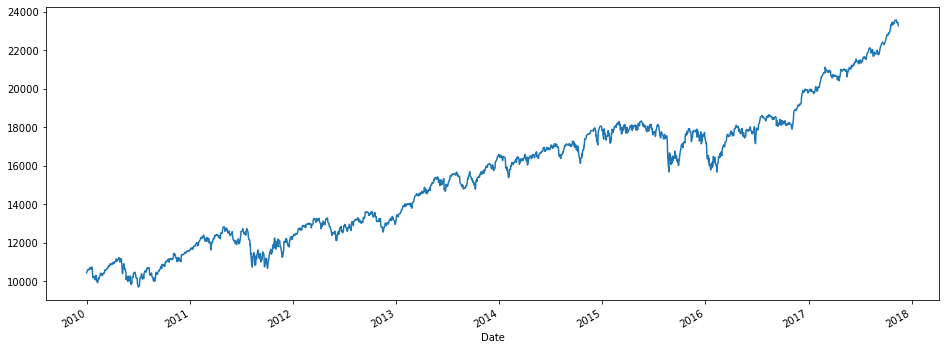

In [603]:
djiDF['Close'].plot(figsize = (16, 6))

In [ ]:
part = 0.80
train_data, test_data = df_log[3:int(len(df_log)*part)], df_log[int(len(df_log)*part):]

In [879]:
from datetime import timedelta

predict_days = 7 

dataDF['date_prediction'] = dataDF.index + timedelta(predict_days)
#index_shift = dataDF.index - timediff(predict_days)
label_col = dataDF[['Close']]
label_col.columns = ['predict_label']
label_col['date_prediction'] = label_col.index





<ipython-input-879-66f9952393c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_col['date_prediction'] = label_col.index


In [880]:
dataDF['Date'] = dataDF.index
dataDF2 = pd.merge(dataDF, label_col, how = 'inner', on = 'date_prediction')
dataDF2.index = dataDF2['Date']
dataDF2 = dataDF2.drop(columns = ['Date'])

In [881]:
dataDF2['percent_label'] = 100*(dataDF2['predict_label'] - dataDF2['Close'])/dataDF2['Close']



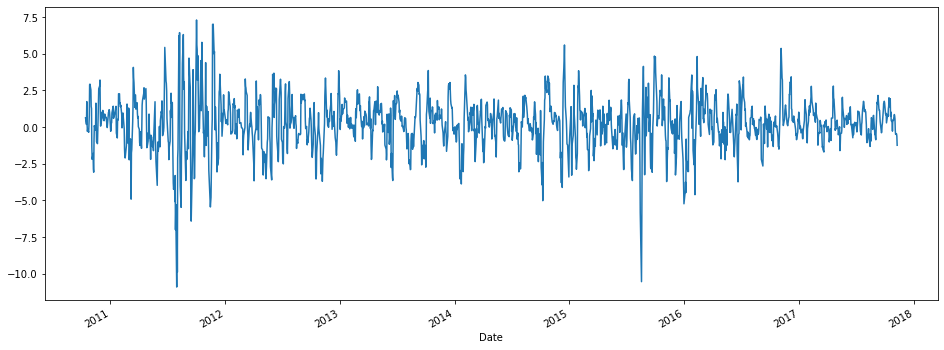

In [882]:
dataDF2['percent_label'].plot(figsize = (16, 6))

In [609]:
plt.plot(train_data['Close'], color ="black", label = "train")
plt.plot(test_data['Close'], color="red", label = "test")
plt.legend()
plt.show()

KeyError: 'Close'

In [610]:
dataDF2.columns

Index(['Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5', 'ROC_10',
       'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200', 'DTB4WK',
       'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA', 'DBAA', 'GBP',
       'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM', 'MSFT', 'WFC',
       'XOM', 'FCHI', 'FTSE', 'GDAXI', 'GSPC', 'HSI', 'IXIC', 'SSEC', 'RUT',
       'NYSE', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2', 'DE4', 'DE5',
       'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'Name', 'AUD', 'Brent', 'CAC-F',
       'copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F', 'gold-F',
       'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD', 'silver-F',
       'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F', 'Dollar index',
       'wheat-F', 'XAG', 'XAU', 'date_prediction', 'predict_label',
       'percent_label'],
      dtype='object')

In [325]:
dataDF2.iloc[:, 40:]

,IXIC,SSEC,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,...,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,date_prediction,predict_label,percent_label
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-15,0.013710,0.031783,-0.002171,-0.003444,2.45,2.45,2.42,0.00,0.03,1.04,...,0.13,0.35,0.51,0.51,-0.30,-1.30,-0.88,2010-10-22,11132.559570,0.630757
2010-10-18,0.004816,-0.005363,0.009912,0.006715,2.38,2.37,2.34,0.01,0.04,1.04,...,0.28,0.07,-0.17,-0.14,-2.05,0.25,0.05,2010-10-25,11164.049805,0.182699
2010-10-19,-0.017620,0.015777,-0.022503,-0.019475,2.36,2.36,2.32,0.00,0.04,1.05,...,-1.23,1.27,1.66,1.62,-2.58,-4.14,-2.51,2010-10-26,11169.459961,1.738286
2010-10-20,0.008388,0.000699,0.011467,0.013492,2.37,2.37,2.34,0.00,0.03,1.05,...,0.94,-1.01,-1.29,-1.29,2.52,2.44,0.82,2010-10-27,11126.280273,0.164842
2010-10-21,0.000928,-0.006797,-0.005683,-0.001082,2.44,2.44,2.39,0.00,0.05,1.06,...,0.09,0.64,0.28,0.32,-3.09,-3.26,-1.55,2010-10-28,11113.950195,-0.292647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-02,-0.000237,-0.000005,0.002526,0.000815,1.35,1.20,1.08,0.15,0.27,0.73,...,0.08,-0.40,-0.13,-0.13,1.73,0.14,0.18,2017-11-09,23461.939453,-0.230990
2017-11-03,0.007372,-0.000005,-0.001096,0.000008,1.34,1.18,1.06,0.16,0.28,0.72,...,0.23,0.14,0.29,0.26,-0.12,-1.78,-0.61,2017-11-10,23422.210938,-0.496952
2017-11-06,0.003252,-0.000005,0.002040,0.002252,1.32,1.15,1.04,0.17,0.28,0.73,...,0.23,-0.32,-0.21,-0.19,1.35,1.99,0.80,2017-11-13,23439.699219,-0.461690


In [883]:
feat_cols = [c for c in dataDF2.columns if (('label' not in c) & ('Name' != c) 
                                           & ('date_prediction' != c))]

feat_cols = [c for c in feat_cols if (('Close' not in c) & ('EMA' not in c))]
label_col = ['percent_label']

In [884]:
feat_cols

['Volume',
 'mom',
 'mom1',
 'mom2',
 'mom3',
 'ROC_5',
 'ROC_10',
 'ROC_15',
 'ROC_20',
 'DTB4WK',
 'DTB3',
 'DTB6',
 'DGS5',
 'DGS10',
 'Oil',
 'Gold',
 'DAAA',
 'DBAA',
 'GBP',
 'JPY',
 'CAD',
 'CNY',
 'AAPL',
 'AMZN',
 'GE',
 'JNJ',
 'JPM',
 'MSFT',
 'WFC',
 'XOM',
 'FCHI',
 'FTSE',
 'GDAXI',
 'GSPC',
 'HSI',
 'IXIC',
 'SSEC',
 'RUT',
 'NYSE',
 'TE1',
 'TE2',
 'TE3',
 'TE5',
 'TE6',
 'DE1',
 'DE2',
 'DE4',
 'DE5',
 'DE6',
 'CTB3M',
 'CTB6M',
 'CTB1Y',
 'AUD',
 'Brent',
 'CAC-F',
 'copper-F',
 'WIT-oil',
 'DAX-F',
 'DJI-F',
 'EUR',
 'FTSE-F',
 'gold-F',
 'HSI-F',
 'KOSPI-F',
 'NASDAQ-F',
 'GAS-F',
 'Nikkei-F',
 'NZD',
 'silver-F',
 'RUSSELL-F',
 'S&P-F',
 'CHF',
 'Dollar index-F',
 'Dollar index',
 'wheat-F',
 'XAG',
 'XAU']

In [885]:
featDF = dataDF2[feat_cols + label_col]
featDF['label'] = featDF[label_col[0]]
featDF = featDF.drop(columns = label_col)

part = 0.80
train_data, test_data = featDF[3:int(len(featDF)*part)], featDF[int(len(featDF)*part):]

<ipython-input-885-83c13df11e3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featDF['label'] = featDF[label_col[0]]


In [886]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

X = train_data.drop(columns = ['label'])
y = np.array(train_data['label'])

X_test = test_data.drop(columns = ['label'])
y_test = np.array(test_data['label'])

X_scaled = sc.fit_transform(X)
X_test_scaled = sc.fit_transform(X_test)

In [887]:
len(train_data_scaled)

1374

In [946]:
from sklearn import tree, ensemble, neighbors, neural_network





#clf = ensemble.AdaBoostRegressor(base_estimator = tree.DecisionTreeRegressor(max_depth=12), n_estimators = 200)
#clf = ensemble.GradientBoostingRegressor(max_depth = 3, n_estimators = 400, learning_rate = 0.05, loss = 'lad')
clf = neighbors.KNeighborsRegressor(n_neighbors = 40, weights = 'uniform')
#clf = neural_network.MLPRegressor(max_iter = 500, alpha = 0.001)
clf = clf.fit(X, y)



In [947]:


predict = clf.predict(X_test)


In [948]:
score = clf.score(X_test, y_test)
score

-0.07017224148878509

In [949]:
def model(max_depth_, n_est):
    clf = ensemble.AdaBoostRegressor(base_estimator = tree.DecisionTreeRegressor(max_depth=max_depth_), n_estimators = n_est)
    clf = clf.fit(X, y)
    score = clf.score(X_test, y_test)
    return (score)

In [425]:
depth_arr = [6, 8, 10, 12, 14]
n_est = [50, 75, 100, 125, 150]

scores = []

for depth in depth_arr: 
    for n in n_est: 
        scores += [[depth, n, model(depth, n)]]
        print (depth, n)
        

6 50
6 75


KeyboardInterrupt: 

In [403]:
rDF = pd.DataFrame(scores, columns = ['depth', 'n_est', 'r2_score'])

In [ ]:
rDF.index = rDF
for d in depth_arr:
    plt.plot(train_data['Close'], color ="black", label = "train")

    plt.plot(test_data['Close'], color="red", label = "test")
plt.legend()
plt.show()

In [404]:
rDF

,depth,n_est,r2_score
0,6,50,-0.487863
1,6,75,-0.343843
2,6,100,-0.433476
3,6,125,-0.752292
4,6,150,-0.430615
5,8,50,-0.286546
6,8,75,-0.335728
7,8,100,-0.320425
8,8,125,-0.294082
9,8,150,-0.272924


In [666]:
feat_impDF = pd.DataFrame(zip(feat_cols, clf.feature_importances_), columns = ['feature', 'importance'])

feat_impDF.sort_values('importance', ascending = False).loc[:20, :]

AttributeError: 'KNeighborsRegressor' object has no attribute 'feature_importances_'

In [950]:
predictDF = pd.DataFrame(index = test_data.index, data = predict, columns = ['prediction'])

No handles with labels found to put in legend.


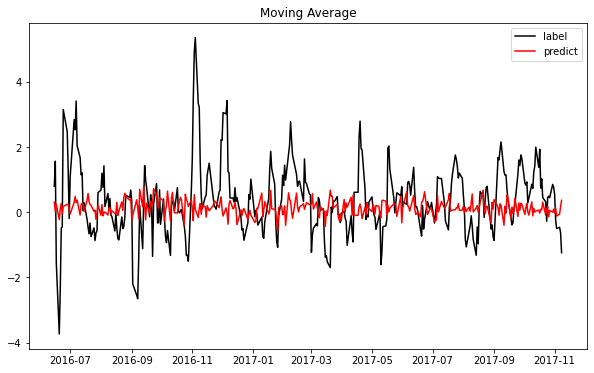

In [951]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

#original_label = featDF[int(len(featDF)*part):][test_data.index]

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(test_data['label'], color ="black", label = "label")
plt.plot(predictDF['prediction'], color="red", label = "predict")
#plt.plot(original_label, color='green', label = 'original')
plt.legend()
plt.show()

In [935]:


resultsDF = pd.concat([test_data, predictDF], axis = 1)


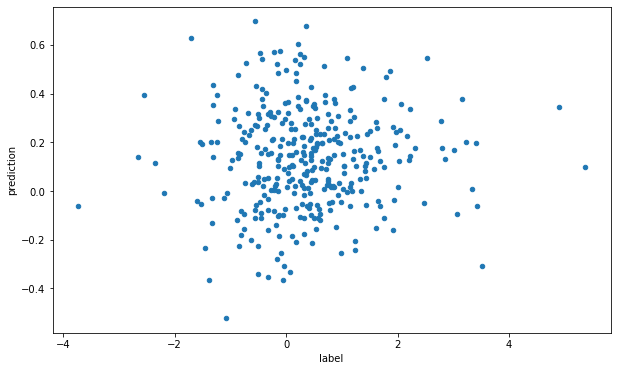

In [936]:
resultsDF.plot.scatter(x = 'label', y = 'prediction')

In [940]:
eps = 0.0
resultsDF['label_class'] = 0 
resultsDF.loc[resultsDF['label'] >= eps, 'label_class'] = 1
resultsDF.loc[resultsDF['label'] <= -eps, 'label_class'] = -1
resultsDF['prediction_class'] = 0 
resultsDF.loc[resultsDF['prediction'] >= eps, 'prediction_class'] = 1
resultsDF.loc[resultsDF['prediction'] <= -eps, 'prediction_class'] = -1


In [941]:
from sklearn import metrics

metrics.confusion_matrix(np.array(resultsDF['label_class']), np.array(resultsDF['prediction_class']))

array([[ 43,  85],
       [ 46, 171]], dtype=int64)

In [942]:
metrics.precision_recall_fscore_support(np.array(resultsDF['label_class']), np.array(resultsDF['prediction_class']))

(array([0.48314607, 0.66796875]),
 array([0.3359375 , 0.78801843]),
 array([0.39631336, 0.7230444 ]),
 array([128, 217], dtype=int64))